Split-Belt Database: Random Forrests
---

https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/Random%20Forest%20Tutorial.ipynb

https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Random%20Forest%20Explained.ipynb

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

To explain Decision Tree: https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/

In [1]:
import pandas as pd # Loadind Data
import matplotlib.pyplot as plt  # To visualize
import numpy as np

RSEED=50

df = pd.read_csv("CleanDataBase.csv")
df.shape
df.head()
#list(df)

,ID,GroupNum,Height,Weight,Age,Male,RightLeg,AdaptationDuration,Abrupt,MidSpeed,...,TMAfter,OGBase,OGAfter,IsCatch,Stroke,TextSpeedRatio,BMI,Young,TMSteadyGood,TMAfterGood
0,B001,1,160.0,60.9,20.0,0,1,604,1,1100,...,0.34534,-0.159450,-0.159450,1,0,2.0,23.789062,1,1,1
1,B002,1,183.5,70.5,-1.0,1,1,602,1,1000,...,NaN,-0.042375,-0.042375,1,0,2.0,20.937122,1,1,0
2,B003,1,174.0,68.0,20.0,0,1,602,1,1100,...,0.13394,0.005824,0.005824,1,0,2.0,22.460034,1,1,1
3,B004,1,159.0,59.2,20.0,1,1,603,1,1000,...,0.15988,0.057757,0.057757,1,0,2.0,23.416795,1,0,1
4,BC001,1,160.0,60.9,20.0,0,1,601,1,1100,...,0.12224,-0.029394,-0.029394,1,0,2.0,23.789062,1,1,1


Features and Targets
---

In [2]:
# Define Features and Target
feature_cols=["SpeedRatio", "SpeedDifference","MidSpeed", "Abrupt", "EarlyA", "MidBase", \
               "AdaptationDuration", "Age", "Young", "Height", "Weight", "BMI",\
             'IsCatch', 'Stroke']#, 'BMI', "Height", "Weight",
#feature_cols=["SpeedRatio", "SpeedDifference","MidSpeed", "EarlyA", "AdaptationDuration", 'Young', 'IsCatch', 'Stroke', 'Abrupt']
#feature_cols=["SpeedDifference", "Abrupt", "EarlyA", "MidBase", "Age", "Young"]

target_cols=["TMSteadyGood"]
#target_cols=["TMAfterGood"]

Features=df[feature_cols]
Target=df[target_cols]


Split the Data into Training and Testing Sets
---

In [3]:
# Split data into training and testing set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(Features,Target,test_size=0.2, random_state = RSEED)

y_test=y_test.values.ravel()
y_train=y_train.values.ravel()

In [4]:
## Training on young data -- test on young
#YoungIntactIndex =  (df.Stroke == 0) # &(df.Age < 40)
#OtherIndex =  (df.Stroke == 1) # &(df.Age < 40)

#Features = Features.drop(df[OtherIndex].index)
#Target = Target.drop(df[OtherIndex].index)

#X_train,X_test,y_train,y_test=train_test_split(Features,Target,test_size=0.2, random_state = RSEED)

#y_test=y_test.values.ravel()
##y_train=y_train.values.ravel()

In [5]:
## Training on young data -- test on old/stroke

#YoungIntactIndex = (df.Age < 40) & (df.Stroke == 0)
#OtherIndex = (df.Age >= 40) | (df.Stroke == 1)

#X_train = Features.drop(df[OtherIndex].index)
#y_train = Target.drop(df[OtherIndex].index)

#X_test = Features.drop(df[YoungIntactIndex].index)
#y_test = Target.drop(df[YoungIntactIndex].index)


Random Forest
---

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(random_state=RSEED, max_depth=4)
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

Make Predictions
---

In [7]:
# Actual class predictions
rf_predictions = model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(X_train)
train_rf_probs = model.predict_proba(X_train)[:, 1]


Confusion Matrix
---

In [8]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt  # To visualize

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #print(cm)
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    plt.show()

Confusion matrix, without normalization


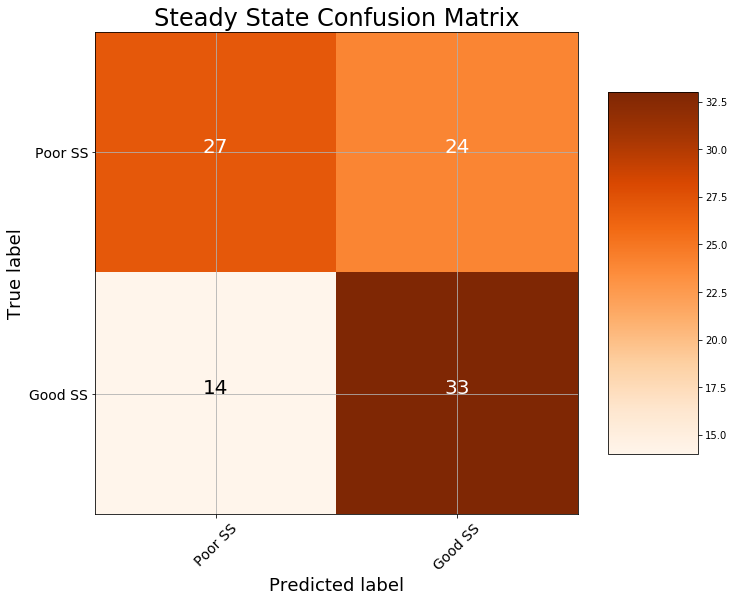

In [9]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['Poor SS', 'Good SS'],
                      title = 'Steady State Confusion Matrix')

ROC Curve
---

In [10]:
## Tagen from: https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

def evaluate_model(predictions, probs, train_predictions, train_probs, train_labels, test_labels):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

Recall Baseline: 1.0 Test: 0.7 Train: 0.86
Precision Baseline: 0.48 Test: 0.58 Train: 0.76
Roc Baseline: 0.5 Test: 0.6 Train: 0.86


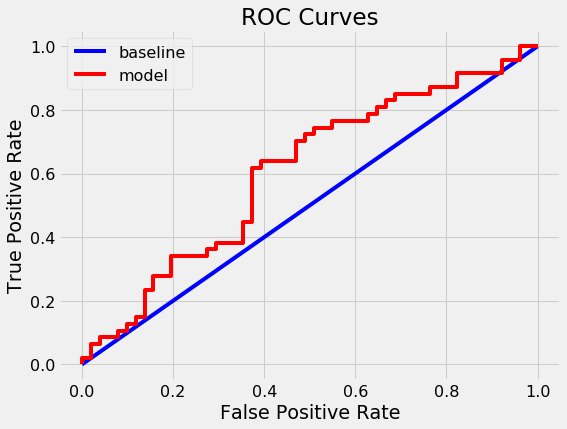

In [11]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs, y_train, y_test)

Random Forest Optimization through Random Search
---

In [12]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [13]:
rs.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': 28,
 'min_samples_split': 10,
 'n_estimators': 87}

In [14]:
best_model = rs.best_estimator_

train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

Optimized Confusion Matrix
---

Confusion matrix, without normalization


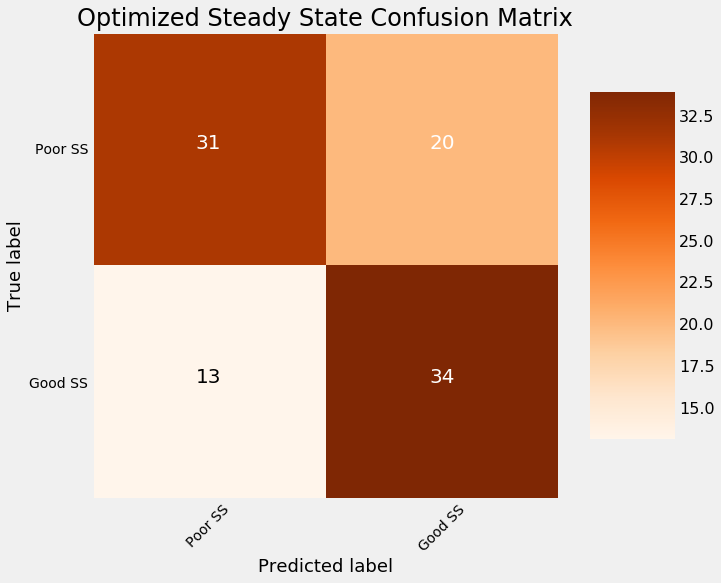

In [15]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['Poor SS', 'Good SS'],
                      title = 'Optimized Steady State Confusion Matrix')

OPtimized ROC Curve
---

Recall Baseline: 1.0 Test: 0.72 Train: 0.93
Precision Baseline: 0.48 Test: 0.63 Train: 0.88
Roc Baseline: 0.5 Test: 0.66 Train: 0.97


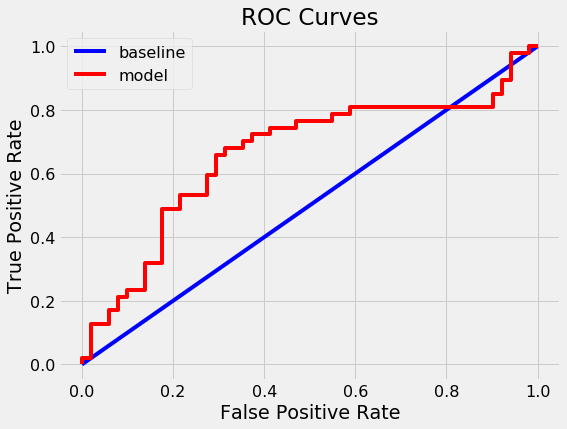

In [16]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs, y_train, y_test)

Saving and Visualizing the Tree
---

In [17]:
from sklearn.tree import export_graphviz
import pydot

estimator = best_model.estimators_[1]

export_graphviz(estimator, out_file = 'OptimizedForest.dot', feature_names = feature_cols,
                rounded = True, precision = 1, class_names = ['goodAdapt', 'badAdapt'], filled = True)


# Use dot file to create a graph
(graphy, ) = pydot.graph_from_dot_file('OptimizedForest.dot')

# Write graph to a png file
graphy.write_png('OptimizedForest.png'); 

Feature Importance
---

In [18]:
# 1 shot approach
import pandas as pd

# Extract feature importances
fi = pd.DataFrame({'feature': list(X_train),
                   'importance': model.feature_importances_})

# Display
fi

,feature,importance
0,SpeedRatio,0.059621
1,SpeedDifference,0.087293
2,MidSpeed,0.053827
3,Abrupt,0.007202
4,EarlyA,0.163584
5,MidBase,0.139628
6,AdaptationDuration,0.108443
7,Age,0.085370
8,Young,0.010086
9,Height,0.108995


Though this changes when you re-run the model the following reatures seem to be the most important:
- Early A
- MidBase
- AdaptationDuration
- Height

And to a lesser extent:
- SpeedDifference
- Age

Quantify Important Interactions
---

Max number of interactions I am able to access is 3.

[ ] https://christophm.github.io/interpretable-ml-book/interaction.html#implementations <br />
[ ] https://pypi.org/project/sklearn-gbmi/  <br />
[ ] https://github.com/ralphhaygood/sklearn-gbmi/blob/master/example.ipynb <br />
[ ] https://blog.macuyiko.com/post/2019/discovering-interaction-effects-in-ensemble-models.html <br />

In [20]:
from sklearn_gbmi import *
from sklearn.ensemble import GradientBoostingRegressor

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

gbr_1 = GradientBoostingRegressor()
gbr_1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
# Compute the two-variable H statistic of each pair of predictor variables. 
h_all_pairs(gbr_1, X_train)

{('Abrupt', 'AdaptationDuration'): 1.3402448145319123e-16,
 ('Abrupt', 'Age'): 2.146870925871649e-16,
 ('Abrupt', 'BMI'): 1.6788629572731472e-16,
 ('Abrupt', 'EarlyA'): 1.3524380189668732e-16,
 ('Abrupt', 'Height'): 2.2370673502163465e-16,
 ('Abrupt', 'IsCatch'): 2.4563535116416156e-16,
 ('Abrupt', 'MidBase'): 3.0612631935429923e-16,
 ('Abrupt', 'Stroke'): 1.0314966585054833e-16,
 ('Abrupt', 'Weight'): 0.08468499773679533,
 ('Abrupt', 'Young'): 6.484681045498432e-16,
 ('AdaptationDuration', 'Age'): 0.20024184588039323,
 ('AdaptationDuration', 'BMI'): 0.11067619266177127,
 ('AdaptationDuration', 'Height'): 0.15059638689626878,
 ('AdaptationDuration', 'IsCatch'): 0.03043226746948996,
 ('AdaptationDuration', 'Stroke'): 6.563607798332183e-17,
 ('AdaptationDuration', 'Weight'): 0.10425259575239099,
 ('AdaptationDuration', 'Young'): 0.044936537323701765,
 ('Age', 'BMI'): 0.11606450259680567,
 ('Age', 'Height'): 0.26151441271708836,
 ('Age', 'IsCatch'): 0.00012622190323461922,
 ('Age', 'Strok

Below is a list of the 2-way interactions that are greater than 0.2:

- ('AdaptationDuration', 'Age'): 0.20024184588039323, 
- ('Age', 'Height'): 0.26151441271708836,
- ('EarlyA', 'AdaptationDuration'): 0.23521788694359114,
- ('EarlyA', 'Height'): 0.22536903361504695,
- ('EarlyA', 'MidBase'): 0.29167726190763665,
- ('EarlyA', 'Weight'): 0.2277320156420949,
- ('Height', 'Weight'): 0.3889945473025645,
- ('MidBase', 'AdaptationDuration'): 0.20388717316016972,
- ('MidBase', 'Age'): 0.2542360078660651,
- ('MidSpeed', 'AdaptationDuration'): 0.22477301171699263,
- ('MidSpeed', 'Height'): 0.23869998790539995,
- ('Weight', 'BMI'): 0.2745582288141577,
 

Three way interactions are the largest interaction that I can quantify with this methodology.

In [23]:
from itertools import combinations

FeatureName = list(X_train)
Combos = list(combinations(range(len(FeatureName)),3))

for x in range(len(Combos)):#len(Combos):
    ThreeNames = [FeatureName[Combos[x][0]], FeatureName[Combos[x][1]], FeatureName[Combos[x][2]]]
    ThreeFeatures = X_train[ThreeNames]
    
    gbr_2 = GradientBoostingRegressor()        
    gbr_2.fit(ThreeFeatures, y_train)
    ThreeInteraction = h(gbr_2, ThreeFeatures)
    if ThreeInteraction>0.2:
        print(ThreeNames, ' --> ', ThreeInteraction )

['SpeedDifference', 'EarlyA', 'AdaptationDuration']  -->  0.20153730773769263
['MidSpeed', 'Abrupt', 'Young']  -->  0.20580460599119432
['Abrupt', 'Young', 'IsCatch']  -->  0.43471740801017683
['Young', 'IsCatch', 'Stroke']  -->  0.3314530464860184


It appears that there are a few important 3-way interactions.  Even though this library does not allow higher order interactions, it seems like the following Features could be interacting in higher order interactions
- 'MidSpeed'
- 'Abrupt'
- 'Young' 
- 'IsCatch'
- 'Stroke'

Selected Features to Predict Binary TMSteadyState
---

Single Features:
- Early A
- MidBase
- AdaptationDuration
- Height
- SpeedDifference
- Age

Two-Way Feature Interactions:
- ('AdaptationDuration', 'Age')
- ('Age', 'Height')
- ('EarlyA', 'AdaptationDuration')
- ('EarlyA', 'Height')
- ('EarlyA', 'MidBase')
- ('EarlyA', 'Weight')
- ('Height', 'Weight')
- ('MidBase', 'AdaptationDuration')
- ('MidBase', 'Age')
- ('MidSpeed', 'AdaptationDuration')
- ('MidSpeed', 'Height')
- ('Weight', 'BMI')

Three-Way Feature Interactions:
- 'SpeedDifference', 'EarlyA', 'AdaptationDuration'
- 'MidSpeed', 'Abrupt', 'Young'
- 'Abrupt', 'Young', 'IsCatch'
- 'Young', 'IsCatch', 'Stroke'